In [1]:
import pytesseract
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [2]:
pytesseract.pytesseract.image_to_string="C:\Program Files (x86)\Tesseract-OCR\tesseract.exe"

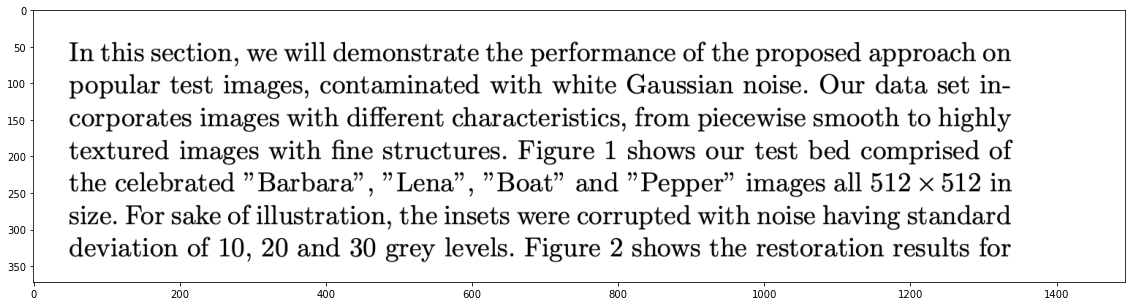

In [3]:
plt.figure(figsize=(20,5))
img=plt.imread("image.jpg")
plt.imshow(img)

In [4]:
def ocr_file(file_name):
    text=pytesseract.image_to_string(Image.open(file_name))
    return text
ocr_file("image.jpg")

'In this section, we will demonstrate the performance of the proposed approach on\npopular test images, contaminated with white Gaussian noise. Our data set in-\ncorporates images with different characteristics, from piecewise smooth to highly\ntextured images with fine structures. Figure 1 shows our test bed comprised of\nthe celebrated ” Barbara”, ” Lena”, ” Boat” and ” Pepper” images all 512 x 512 in\nsize. For sake of illustration, the insets were corrupted with noise having standard\ndeviation of 10, 20 and 30 grey levels. Figure 2 shows the restoration results for\n'

In [5]:
data=pytesseract.image_to_data(Image.open("image.jpg"),    lang="eng",    output_type="data.frame")
data=data[data["conf"]>10]
data.index=range(data.shape[0])
data.head()

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,5,1,1,1,1,1,50,44,33,26,96.852712,In
1,5,1,1,1,1,2,92,44,60,26,96.186224,this
2,5,1,1,1,1,3,162,45,119,32,96.766330,"section,"
3,5,1,1,1,1,4,292,53,42,17,96.766330,we
4,5,1,1,1,1,5,343,44,58,26,96.639131,will


In [6]:
data.head(3)

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,5,1,1,1,1,1,50,44,33,26,96.852712,In
1,5,1,1,1,1,2,92,44,60,26,96.186224,this
2,5,1,1,1,1,3,162,45,119,32,96.766330,"section,"


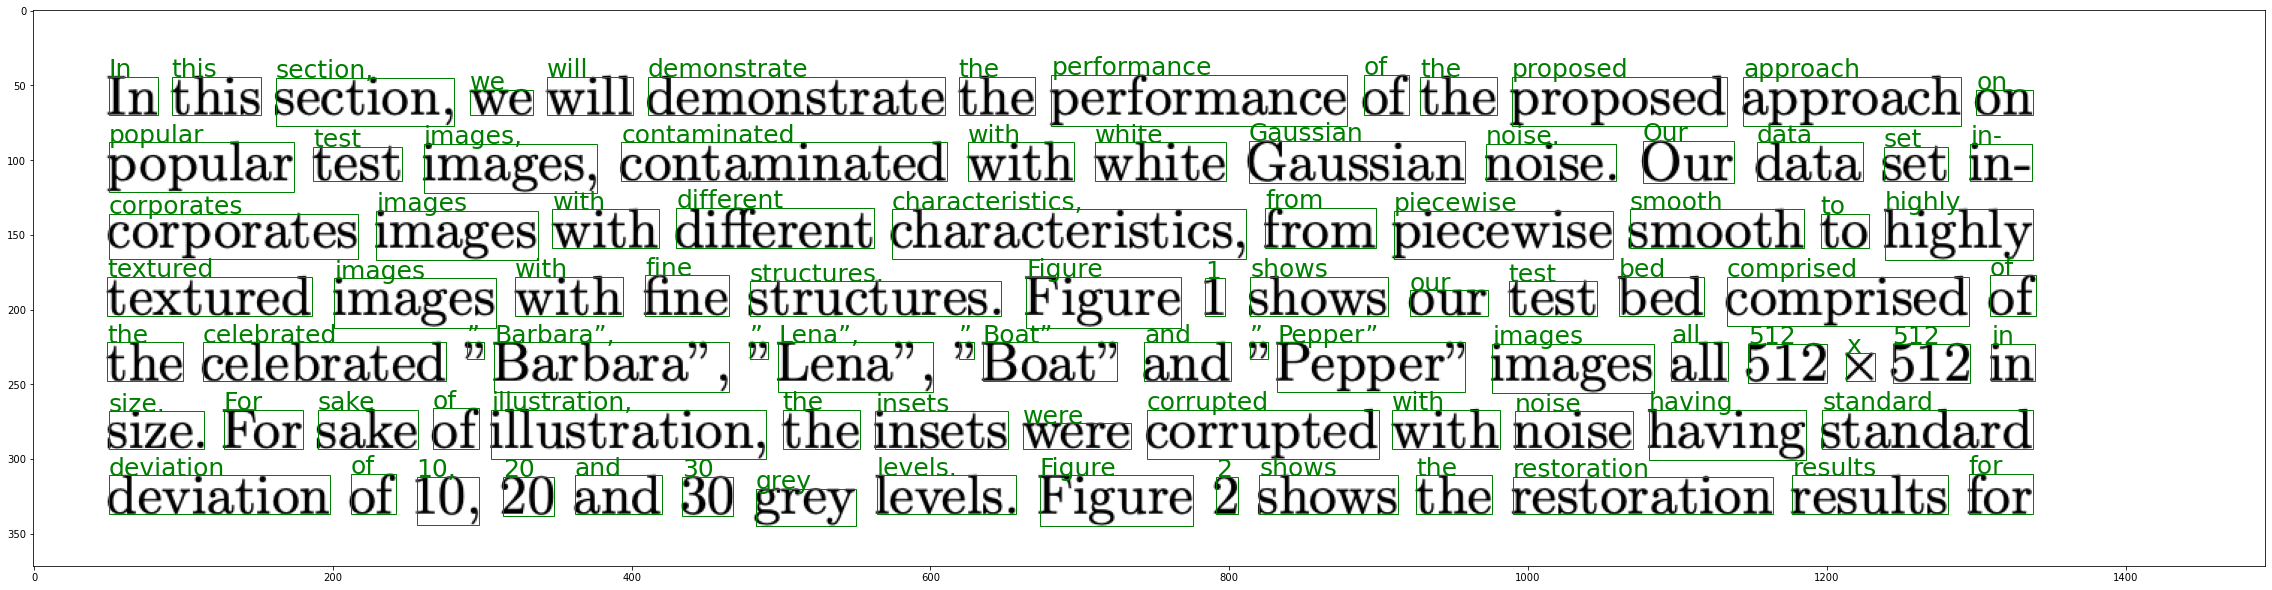

In [7]:
plt.figure(figsize=(40,30))
img=plt.imread("image.jpg")
plt.imshow(img)
ax=plt.gca()


for i in range(data.shape[0]):
    x1,y1,x2,y2=data.loc[i,"left"],data.loc[i,"top"],data.loc[i,"width"],data.loc[i,"height"]
    rect=Rectangle((x1,y1),x2,y2,fill=False,color="green")
    ax.add_patch(rect)
    plt.text(x1,y1,data.loc[i,"text"],color="green",fontsize=25)
plt.show()
    